In [1]:
pip install pyunpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.2 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from pyunpack import Archive
Archive("drive/MyDrive/SQLProjects/database.sqlite.zip").extractall(".")

In [5]:
import numpy as np
import pandas as pd
import sqlite3

database = 'database.sqlite'
con = sqlite3.connect(database)

In [6]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", con)    #Displaying all the different tables in this Database
tables 

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [7]:
pd.set_option('display.max_columns', None) 

In [8]:
plr_att = pd.read_sql("""SELECT *
                         FROM Player_Attributes;""",con)

plr_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
player = pd.read_sql("""SELECT *
                     FROM Player;""",con)

player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
match = pd.read_sql("""SELECT *
                       FROM Match;""",con)

match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [35]:
home_loss_pl = pd.read_sql("""SELECT tm.team_long_name,
                              CASE
                                  WHEN (mt.home_team_goal - mt.away_team_goal) > 0 THEN 1
                                  WHEN (mt.home_team_goal - mt.away_team_goal) < 0 THEN -1
                                  ELSE 0
                              END AS home_wins,COUNT(3) AS No_Loss
                              FROM Team tm, Match mt
                              WHERE mt.home_team_api_id = tm.team_api_id AND home_wins = -1 AND mt.league_id = 1729 
                              GROUP BY mt.home_team_api_id
                              ORDER BY No_Loss DESC;""",con)

home_loss_pl.drop(columns = ['home_wins'],inplace=True)
home_loss_pl.head()

,team_long_name,No_Loss
0,Aston Villa,57
1,Sunderland,56
2,West Bromwich Albion,52
3,West Ham United,46
4,Newcastle United,44


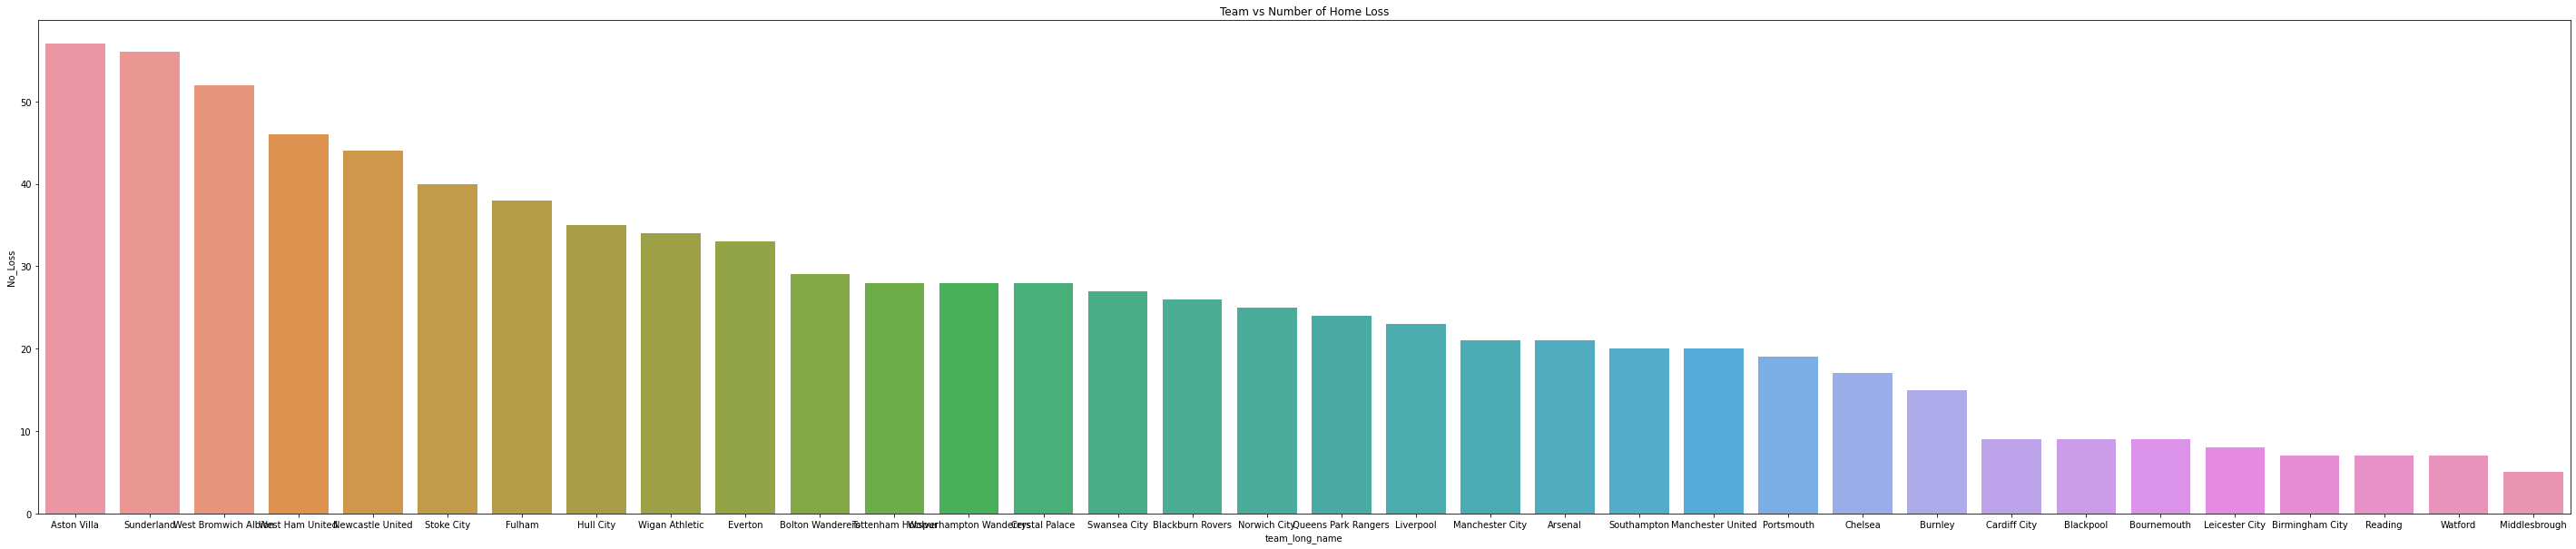

In [47]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(50,10))
sns.barplot(x=home_loss_pl.team_long_name,y=home_loss_pl.No_Loss).set(title='Team vs Number of Home Loss')
plt.show()

In [36]:
home_wins_pl = pd.read_sql("""SELECT tm.team_long_name,
                              CASE
                                  WHEN (mt.home_team_goal - mt.away_team_goal) > 0 THEN 1
                                  WHEN (mt.home_team_goal - mt.away_team_goal) < 0 THEN -1
                                  ELSE 0
                              END AS home_wins,COUNT(3) AS No_Wins
                              FROM Team tm, Match mt
                              WHERE mt.home_team_api_id = tm.team_api_id AND home_wins = 1 AND mt.league_id = 1729 
                              GROUP BY mt.home_team_api_id
                              ORDER BY No_Wins DESC;""",con)

home_wins_pl.drop(columns = ['home_wins'],inplace=True)
home_wins_pl.head()

,team_long_name,No_Wins
0,Manchester United,116
1,Manchester City,113
2,Chelsea,101
3,Arsenal,97
4,Tottenham Hotspur,88


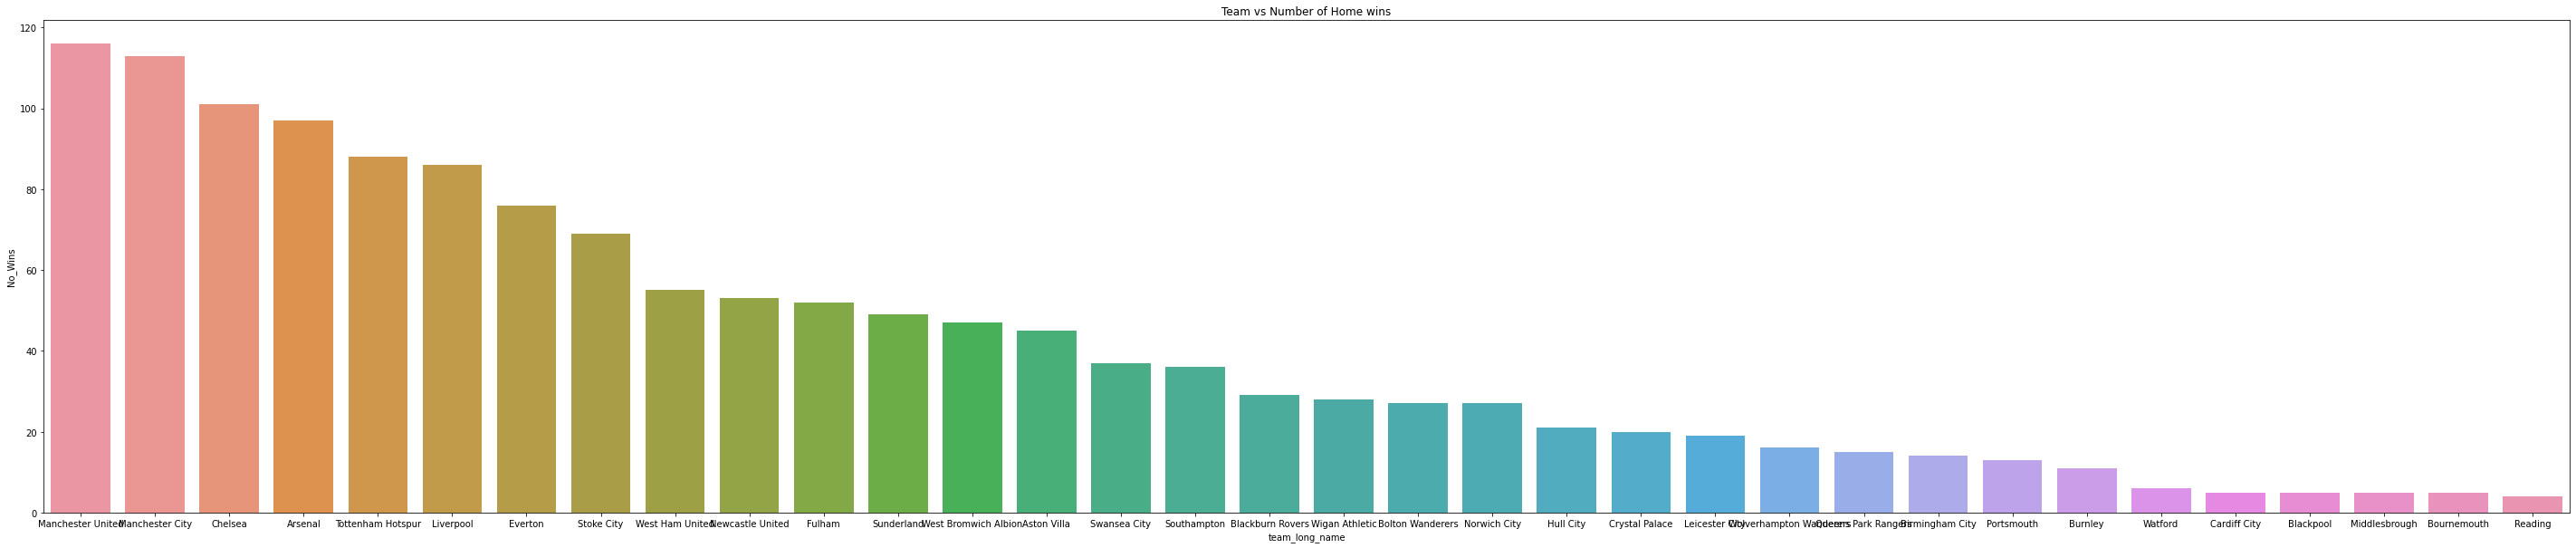

In [48]:

fig, ax = plt.subplots(figsize=(50,10))
sns.barplot(x=home_wins_pl.team_long_name,y=home_wins_pl.No_Wins).set(title="Team vs Number of Home wins")
plt.show()

In [42]:
away_wins_pl = pd.read_sql("""SELECT tm.team_long_name,
                              CASE
                                  WHEN (mt.home_team_goal - mt.away_team_goal) > 0 THEN 1
                                  WHEN (mt.home_team_goal - mt.away_team_goal) < 0 THEN -1
                                  ELSE 0
                              END AS away_wins,COUNT(3) AS No_Wins
                              FROM Team tm, Match mt
                              WHERE mt.away_team_api_id = tm.team_api_id AND away_wins = -1 AND mt.league_id = 1729 
                              GROUP BY mt.away_team_api_id
                              ORDER BY No_Wins DESC;""",con)

away_wins_pl.drop(columns = ['away_wins'],inplace=True)
away_wins_pl.head()

,team_long_name,No_Wins
0,Manchester United,76
1,Chelsea,75
2,Arsenal,73
3,Liverpool,64
4,Tottenham Hotspur,63


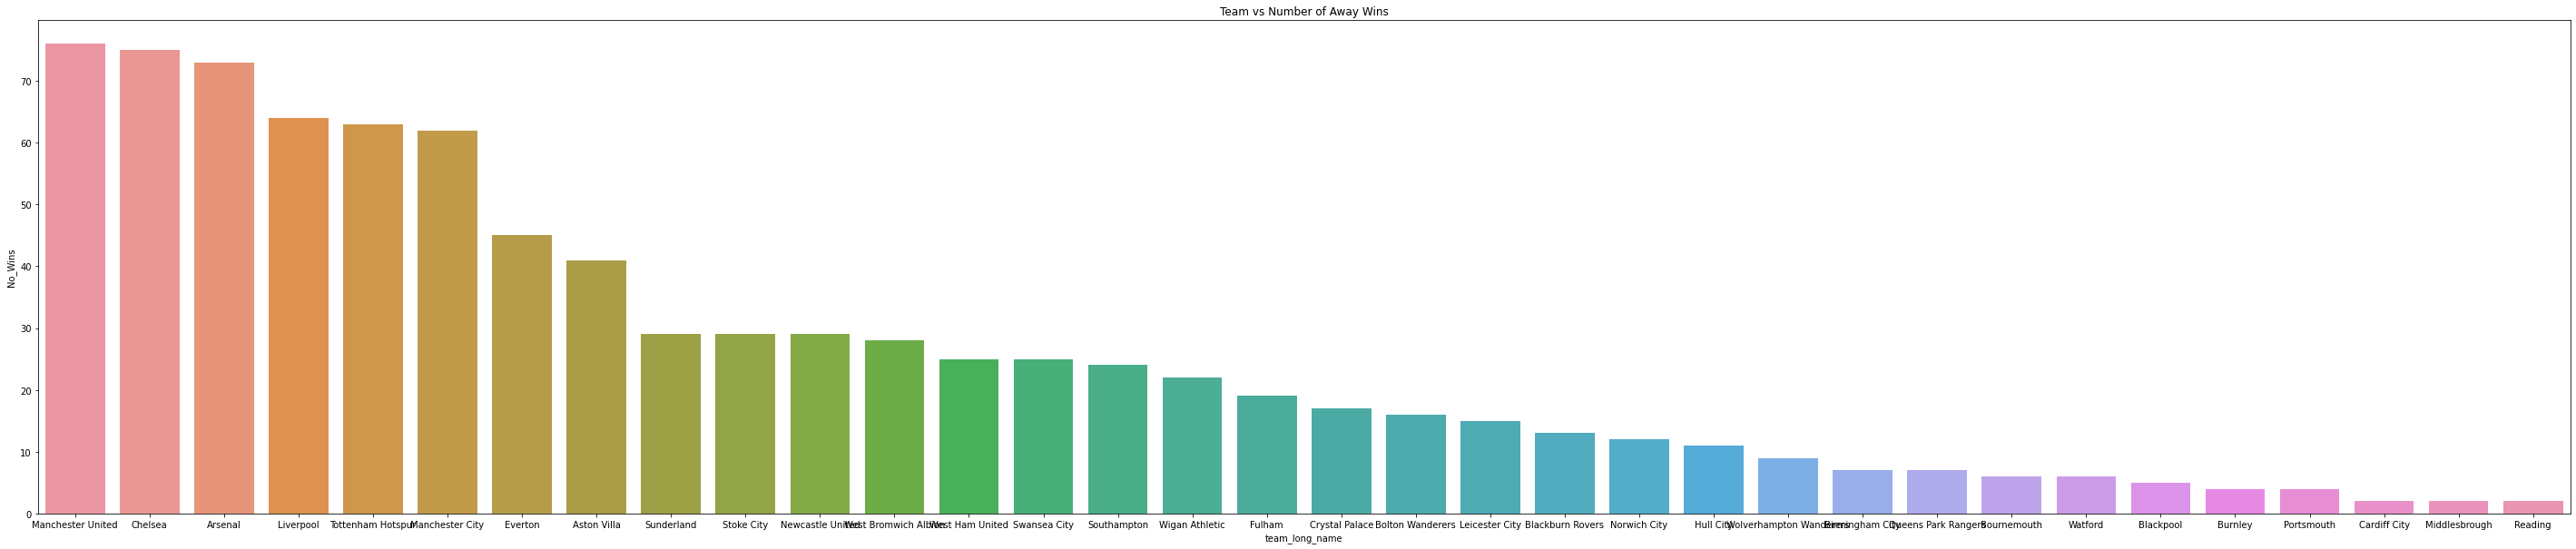

In [49]:
fig, ax = plt.subplots(figsize=(50,10))
sns.barplot(x=away_wins_pl.team_long_name,y=away_wins_pl.No_Wins).set(title="Team vs Number of Away Wins")
plt.show()

In [44]:
away_loss_pl = pd.read_sql("""SELECT tm.team_long_name,
                              CASE
                                  WHEN (mt.home_team_goal - mt.away_team_goal) > 0 THEN 1
                                  WHEN (mt.home_team_goal - mt.away_team_goal) < 0 THEN -1
                                  ELSE 0
                              END AS away_loss,COUNT(3) AS No_Loss
                              FROM Team tm, Match mt
                              WHERE mt.away_team_api_id = tm.team_api_id AND away_loss = 1 AND mt.league_id = 1729 
                              GROUP BY mt.away_team_api_id
                              ORDER BY No_Loss DESC;""",con)

away_loss_pl.drop(columns = ['away_loss'],inplace=True)
away_loss_pl.head()

,team_long_name,No_Loss
0,Stoke City,80
1,Sunderland,78
2,Newcastle United,75
3,Aston Villa,73
4,West Ham United,66


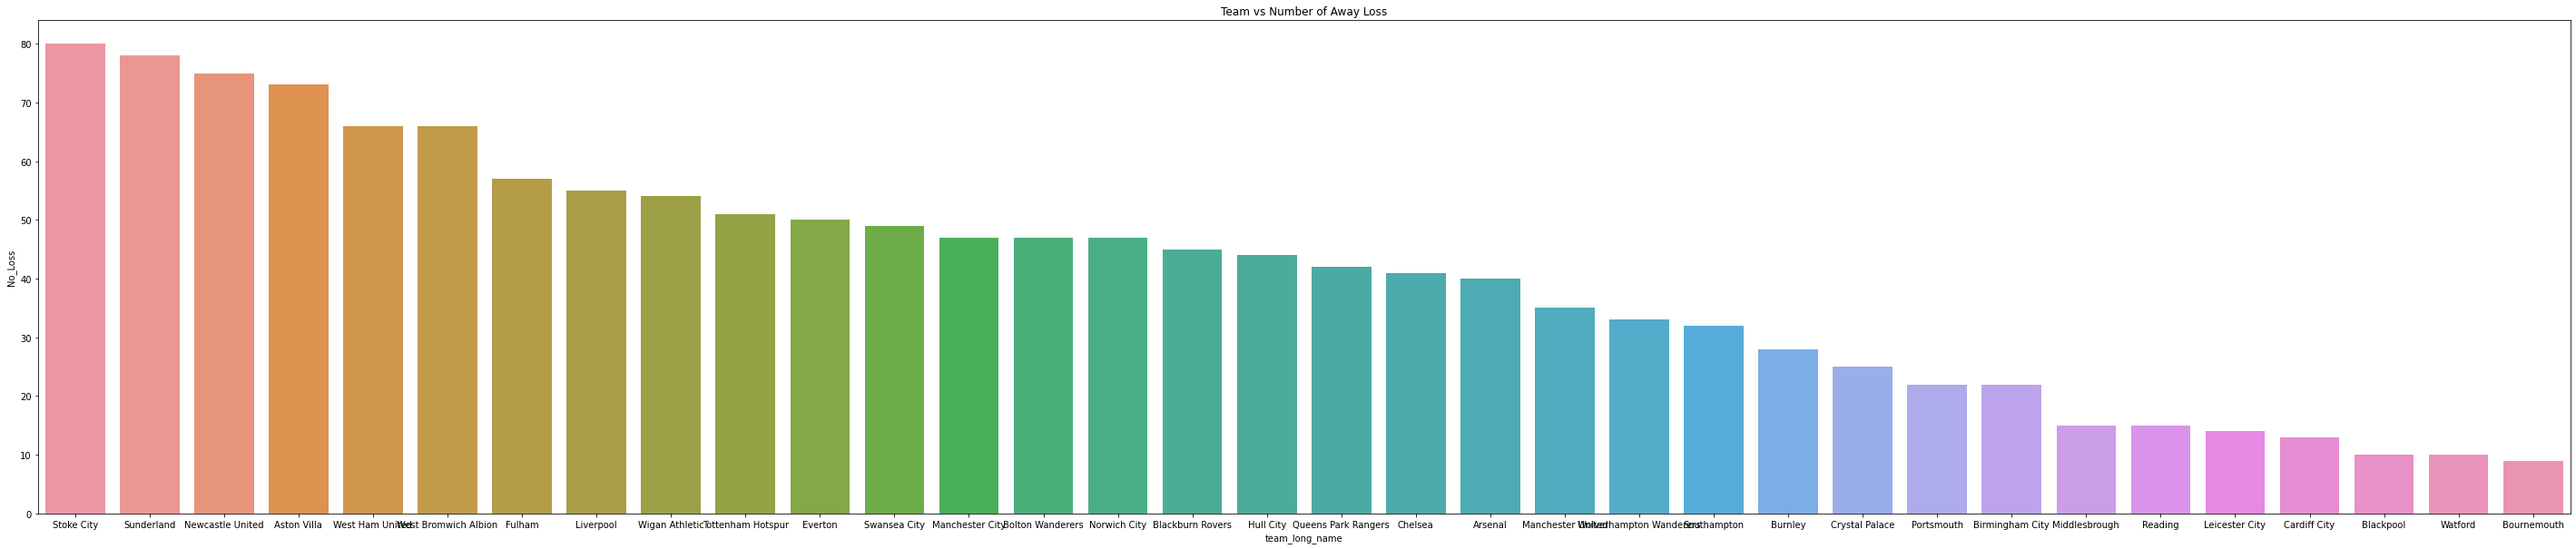

In [50]:
fig, ax = plt.subplots(figsize=(50,10))
sns.barplot(x=away_loss_pl.team_long_name,y=away_loss_pl.No_Loss).set(title="Team vs Number of Away Loss")
plt.show()

In [13]:
home_goals_pl = pd.read_sql("""SELECT mt.season,SUM(mt.home_team_goal) AS Home_Goals,tm.team_long_name
                            FROM Match mt, Team tm
                            WHERE mt.home_team_api_id = tm.team_api_id AND mt.league_id = 1729           
                            GROUP BY mt.season,mt.home_team_api_id
                            ORDER BY mt.season , Home_Goals DESC;""",con)

home_goals_pl.head()

,season,Home_Goals,team_long_name
0,2008/2009,43,Manchester United
1,2008/2009,41,Liverpool
2,2008/2009,40,Manchester City
3,2008/2009,33,Chelsea
4,2008/2009,31,Everton


In [14]:
away_goals_pl = pd.read_sql("""SELECT mt.season,SUM(mt.away_team_goal) AS Away_Goals,tm.team_long_name
                            FROM Match mt, Team tm
                            WHERE mt.home_team_api_id = tm.team_api_id AND mt.league_id = 1729
                            GROUP BY mt.season,mt.home_team_api_id
                            ORDER BY mt.season, Away_Goals DESC;""",con)

away_goals_pl.head()

,season,Away_Goals,team_long_name
0,2008/2009,36,Hull City
1,2008/2009,33,West Bromwich Albion
2,2008/2009,29,Portsmouth
3,2008/2009,29,Newcastle United
4,2008/2009,25,Sunderland


In [15]:
league = pd.read_sql("""SELECT *
                        FROM League;""",con)

league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [16]:
Country = pd.read_sql("""SELECT *
                         FROM Country;""",con)

Country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [17]:
team = pd.read_sql("""SELECT *
                      FROM Team;""",con)

team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [18]:
team_att = pd.read_sql("""SELECT *
                          FROM Team_Attributes;""",con)

team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [19]:
heavy_players = pd.read_sql("""SELECT *
                               FROM Player 
                               ORDER BY weight DESC
                               LIMIT 100;""",con)

heavy_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,5908,148325,Kristof van Hout,185306,1987-02-09 00:00:00,208.28,243
1,10313,27313,Tim Wiese,53012,1981-12-17 00:00:00,193.04,243
2,4884,5044,Jeroen Verhoeven,137692,1980-04-30 00:00:00,198.12,227
3,4412,27267,Ishmael Miller,169725,1987-03-05 00:00:00,193.04,225
4,1598,101584,Cassio,167958,1987-06-06 00:00:00,195.58,220


In [20]:
light_players = pd.read_sql("""SELECT *
                               FROM Player
                               ORDER BY weight 
                               LIMIT 100;""",con)

light_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,5453,97226,Juan Quero,171126,1984-10-17 00:00:00,157.48,117
1,6853,306631,Mariusz Rybicki,208095,1993-03-13 00:00:00,175.26,121
2,10954,108461,Yohandry Orozco,202559,1991-03-19 00:00:00,165.10,121
3,1480,163840,Caetano,199931,1991-04-20 00:00:00,165.10,123
4,2612,103139,Diego Buonanotte,170719,1988-04-19 00:00:00,160.02,123


In [21]:
tall_players = pd.read_sql("""SELECT *
                              FROM Player
                              ORDER BY height DESC
                              LIMIT 100;""",con)

tall_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,5908,148325,Kristof van Hout,185306,1987-02-09 00:00:00,208.28,243
1,1301,150209,Bogdan Milic,189967,1987-11-24 00:00:00,203.20,216
2,1926,103428,Costel Pantilimon,192613,1987-02-01 00:00:00,203.20,212
3,3274,601304,Fejsal Mulic,226114,1994-10-03 00:00:00,203.20,185
4,5568,26585,Jurgen Wevers,148875,1979-01-12 00:00:00,203.20,212


In [22]:
pl_rt = pd.read_sql("""SELECT AVG(overall_rating) as rating
                       FROM Player_Attributes
                       GROUP BY player_api_id;""",con)

pl_rt.head()

,rating
0,60.142857
1,69.380952
2,69.285714
3,71.133333
4,70.200000


In [23]:
short_players = pd.read_sql("""SELECT *
                               FROM Player
                               ORDER BY height 
                               LIMIT 100;""",con)

short_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,5453,97226,Juan Quero,171126,1984-10-17 00:00:00,157.48,117
1,2612,103139,Diego Buonanotte,170719,1988-04-19 00:00:00,160.02,123
2,7258,29587,Maxi Moralez,183895,1987-02-27 00:00:00,160.02,126
3,832,11327,Anthony Deroin,51121,1979-03-15 00:00:00,162.56,146
4,1084,30691,Bakari Kone,137113,1981-09-17 00:00:00,162.56,134


In [24]:
ht_pt = pd.read_sql("""SELECT pl.player_api_id, pl.height, AVG(plttr.potential) AS Average_Potential, AVG(plttr.overall_rating) as Average_overall_rating
                       FROM Player pl, Player_Attributes plttr
                       WHERE pl.player_api_id = plttr.player_api_id
                       GROUP BY pl.player_api_id
                       ORDER BY pl.height;""",con)

ht_pt.head()

,player_api_id,height,Average_Potential,Average_overall_rating
0,97226,157.48,71.200000,66.300000
1,29587,160.02,78.952381,75.809524
2,103139,160.02,79.482759,73.413793
3,11327,162.56,71.777778,68.333333
4,30691,162.56,76.750000,74.000000


In [32]:
wt_pt = pd.read_sql("""SELECT pl.player_api_id, pl.weight, AVG(plttr.potential) AS Average_Potential, AVG(plttr.overall_rating) as Average_overall_rating
                       FROM Player pl, Player_Attributes plttr
                       WHERE pl.player_api_id = plttr.player_api_id
                       GROUP BY pl.player_api_id
                       ORDER BY pl.weight;""",con)

wt_pt.head()

,player_api_id,weight,Average_Potential,Average_overall_rating
0,97226,117,71.200000,66.300000
1,108461,121,77.333333,66.000000
2,306631,121,66.000000,58.100000
3,103139,123,79.482759,73.413793
4,163840,123,74.052632,67.052632


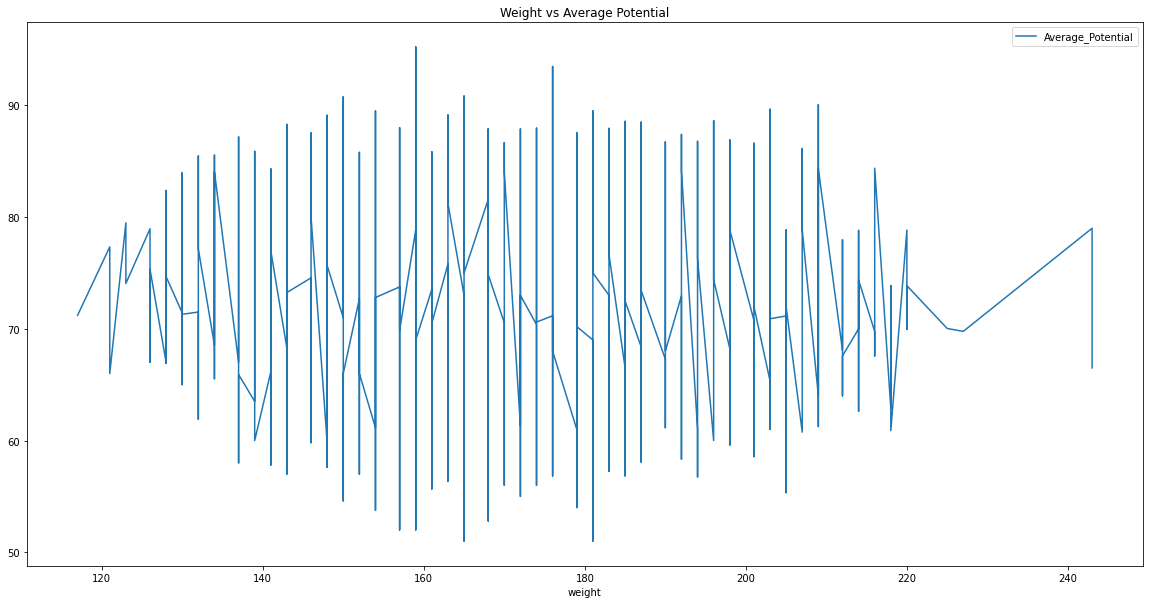

In [33]:
import matplotlib.pyplot as plt

wt_pt.plot(x='weight', y='Average_Potential', title='Weight vs Average Potential', figsize=(20,10))

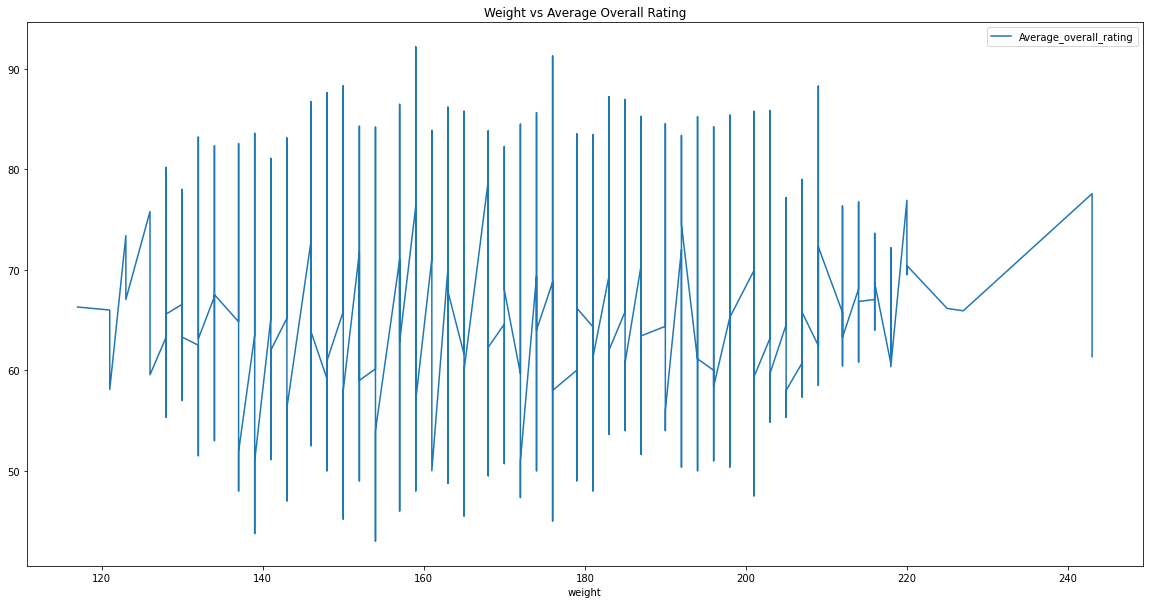

In [34]:
wt_pt.plot(x='weight', y='Average_overall_rating', title='Weight vs Average Overall Rating', figsize=(20,10))

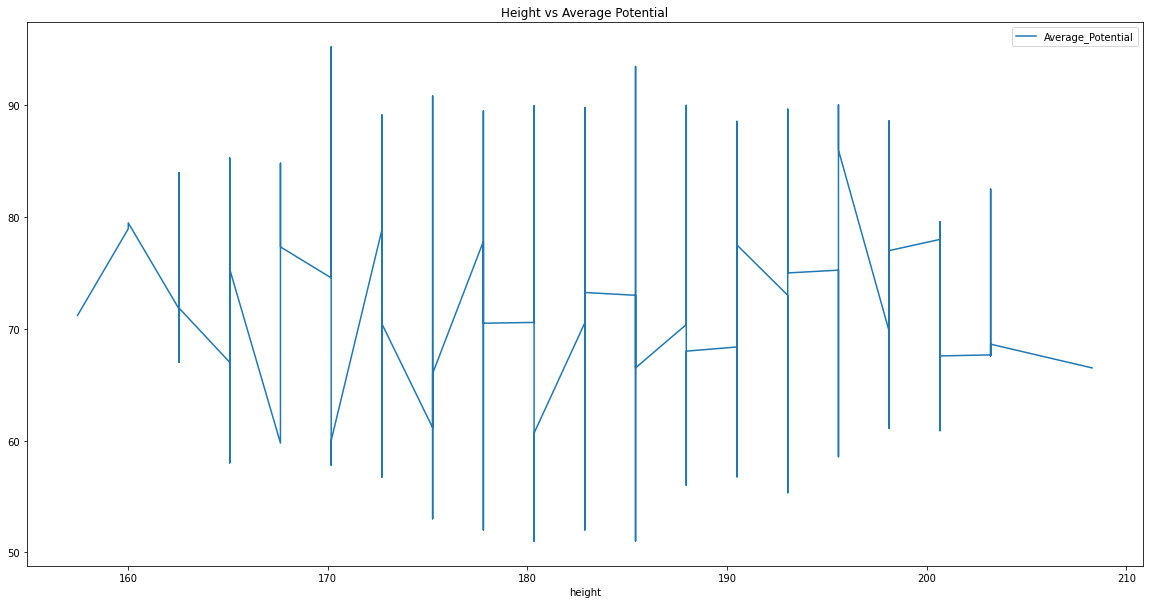

In [30]:
ht_pt.plot(x='height', y='Average_Potential', title='Height vs Average Potential', figsize=(20,10))

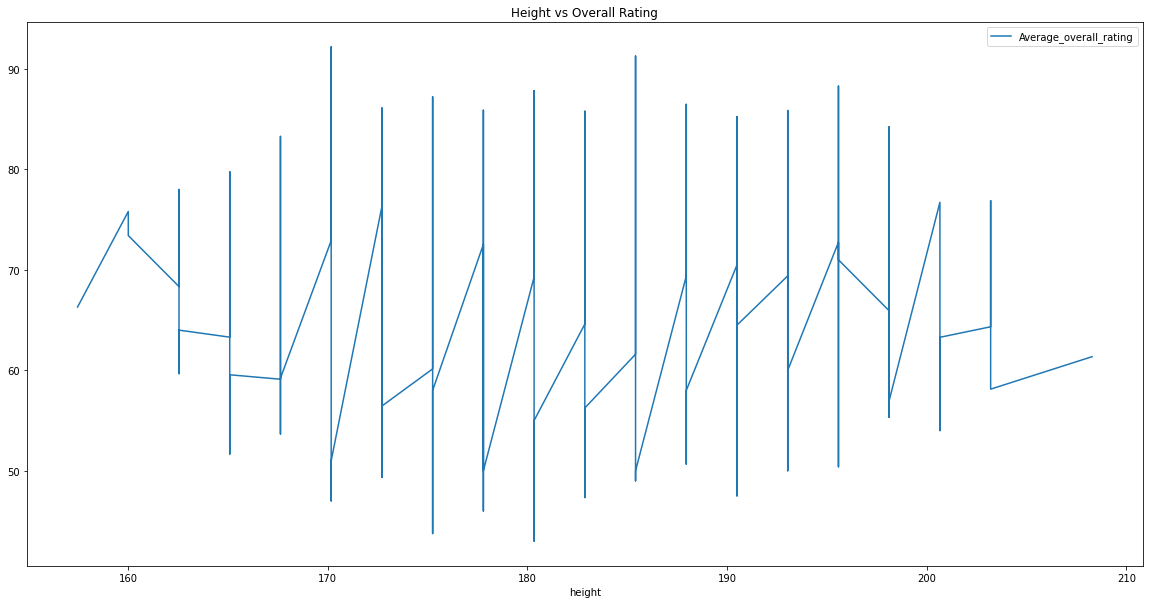

In [31]:
ht_pt.plot(x='height', y='Average_overall_rating', title='Height vs Overall Rating', figsize=(20,10))